## Rendimento Casa/Fuori Casa

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import ax_text
import matplotlib.patheffects as path_effects
from PIL import Image
import urllib
import os
import matplotlib.font_manager as fm

In [4]:
font_path = "./assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("./assets/stylesheets/soc_base.mplstyle")

## I Dati

In [5]:
df = pd.read_csv('./data/fbref_data.csv', sep=',')
df.set_index('Squad')

,Casa,Fuori
Squad,,
Napoli,45,45
Juventus,42,30
Inter,42,30
Lazio,37,37
Milan,43,27
Roma,36,27
Atalanta,33,31
Fiorentina,33,23
Monza,26,26


In [6]:
def calc_diff(data):
    '''
        Funzione che calcola la differenza tra i punti fatti in casa e quelli fuori
    '''
    diffs = pd.Series(index=data.index, name='Diff', dtype=float)
    for x in data.itertuples():
        diffs.loc[x.Index] = (x.Casa-x.Fuori)
    return data.merge(diffs, right_index=True, left_index=True).set_index('Squad')
df_sum = calc_diff(df)
df_sum

,Casa,Fuori,Diff
Squad,,,
Napoli,45,45,0.0
Juventus,42,30,12.0
Inter,42,30,12.0
Lazio,37,37,0.0
Milan,43,27,16.0
Roma,36,27,9.0
Atalanta,33,31,2.0
Fiorentina,33,23,10.0
Monza,26,26,0.0


In [7]:
def calc_percent(data):
    '''
        Trasforma i dati in percentuali
    '''
    df = pd.DataFrame(index=data.index, columns=['Casa', 'Fuori', 'Diff'])
    for x in data.itertuples():
        tot = x.Casa + x.Fuori
        df.loc[x.Index].Casa = x.Casa / tot 
        df.loc[x.Index].Fuori = x.Fuori / tot
        df.loc[x.Index].Diff = x.Diff / tot
    return df
#calc_percent(df_sum).sort_values(by='Diff')[['Casa', 'Fuori']].plot.barh(stacked=True)
calc_percent(df_sum)

,Casa,Fuori,Diff
Squad,,,
Napoli,0.5,0.5,0.0
Juventus,0.583333,0.416667,0.166667
Inter,0.583333,0.416667,0.166667
Lazio,0.5,0.5,0.0
Milan,0.614286,0.385714,0.228571
Roma,0.571429,0.428571,0.142857
Atalanta,0.515625,0.484375,0.03125
Fiorentina,0.589286,0.410714,0.178571
Monza,0.5,0.5,0.0


ID dei loghi delle squadre per il sito https://images.fotmob.com

In [8]:
team_map = {
    'Squad': [
        "Napoli",
        "Lazio",
        "Juventus",
        "Inter",
        "Atalanta",
        "Milan",
        "Roma",
        "Fiorentina",
        "Bologna",
        "Monza",
        "Torino",
        "Sassuolo",
        "Udinese",
        "Salernitana",
        "Empoli",
        "Lecce",
        "Hellas Verona",
        "Spezia",
        "Cremonese",
        "Sampdoria"
    ],
    'fotmob_id':[
        9875,
        8543,
        9885,
        8636,
        8524,
        8564,
        8686,
        8535,
        9857,
        6504,
        9804,
        7943,
        8600,
        6480,
        8534,
        9888,
        9876,
        9881,
        7801,
        9882
    ],
}

team_map = pd.DataFrame(team_map['fotmob_id'], index=team_map['Squad'], columns=['id'])

Colori delle barre

In [9]:
color_casa = "#FFB000" 
color_fuori = "#785EF0"

In [13]:
def plot(ax, fig, df):
    '''
        Genera il grafico completo
    '''
    data = calc_percent(df).sort_values(by='Diff')
    
    ax.barh(
        data.index, 
        data.Casa, 
        ec = "black", 
        lw = 0.5, 
        color = color_casa, 
        zorder = 3, 
        height = 0.75,
        label = "Punti in casa"
    )

    ax.barh(
        data.index, 
        data.Fuori, 
        left = data.Casa,
        ec = "black", 
        lw = 0.5, 
        color = color_fuori, 
        zorder = 3, 
        height = 0.75,
        label = "Punti fuori casa"
    )
    
    ax.legend(
        ncol = 2, 
        bbox_to_anchor = (0.4, 1),
        frameon = False,
        fontsize = 15
    )
    
    # Annotate the bar charts
    x_h = data.Casa.min()
    x_a = data.Fuori.min()
    
    c = 0
    for i in data.index:

        home_text = ax.annotate(
            xy = (x_h/2, c),
            text = f"{data.loc[i].Casa/(data.loc[i].Casa + data.loc[i].Fuori): .0%} ({df.Casa.loc[i]})", # F-strings are cool :)
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
        )

        away_text = ax.annotate(
            xy = (1 - x_a/2, c),
            text = f"{data.loc[i].Fuori/(data.loc[i].Casa + data.loc[i].Fuori): .0%} ({df.Fuori.loc[i]})",
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
        )

        home_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
        )

        away_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
        )
        c += 1
  
    
    # Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
    ax.set_xlim(0, 1)
    ax.spines["top"].set(visible = False)
    ax.xaxis.set_ticks(np.linspace(0, 1, num=21))
    ax.xaxis.set_major_formatter(lambda x, pos: f"{x: .0%}")
    ax.yaxis.set_ticks(
        ticks = [],
        labels = []
    )
    ax.invert_yaxis()
    
    # Adding v-lines
    for x in [.40, .45, .5, .55, .60, .65]:
        ax.axvline(x, 0, 1, color='#363636', zorder=10, linestyle='dotted')
    
    # Plotting team logos
    # starting from .815 -> x-0.035
    y = 0.815
    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for i in data.index:
        logo_ax = fig.add_axes([0.1, y, 0.03, 0.03], anchor = "W")
        y = round(y -0.0355, 6)
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_map.loc[i].id:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    

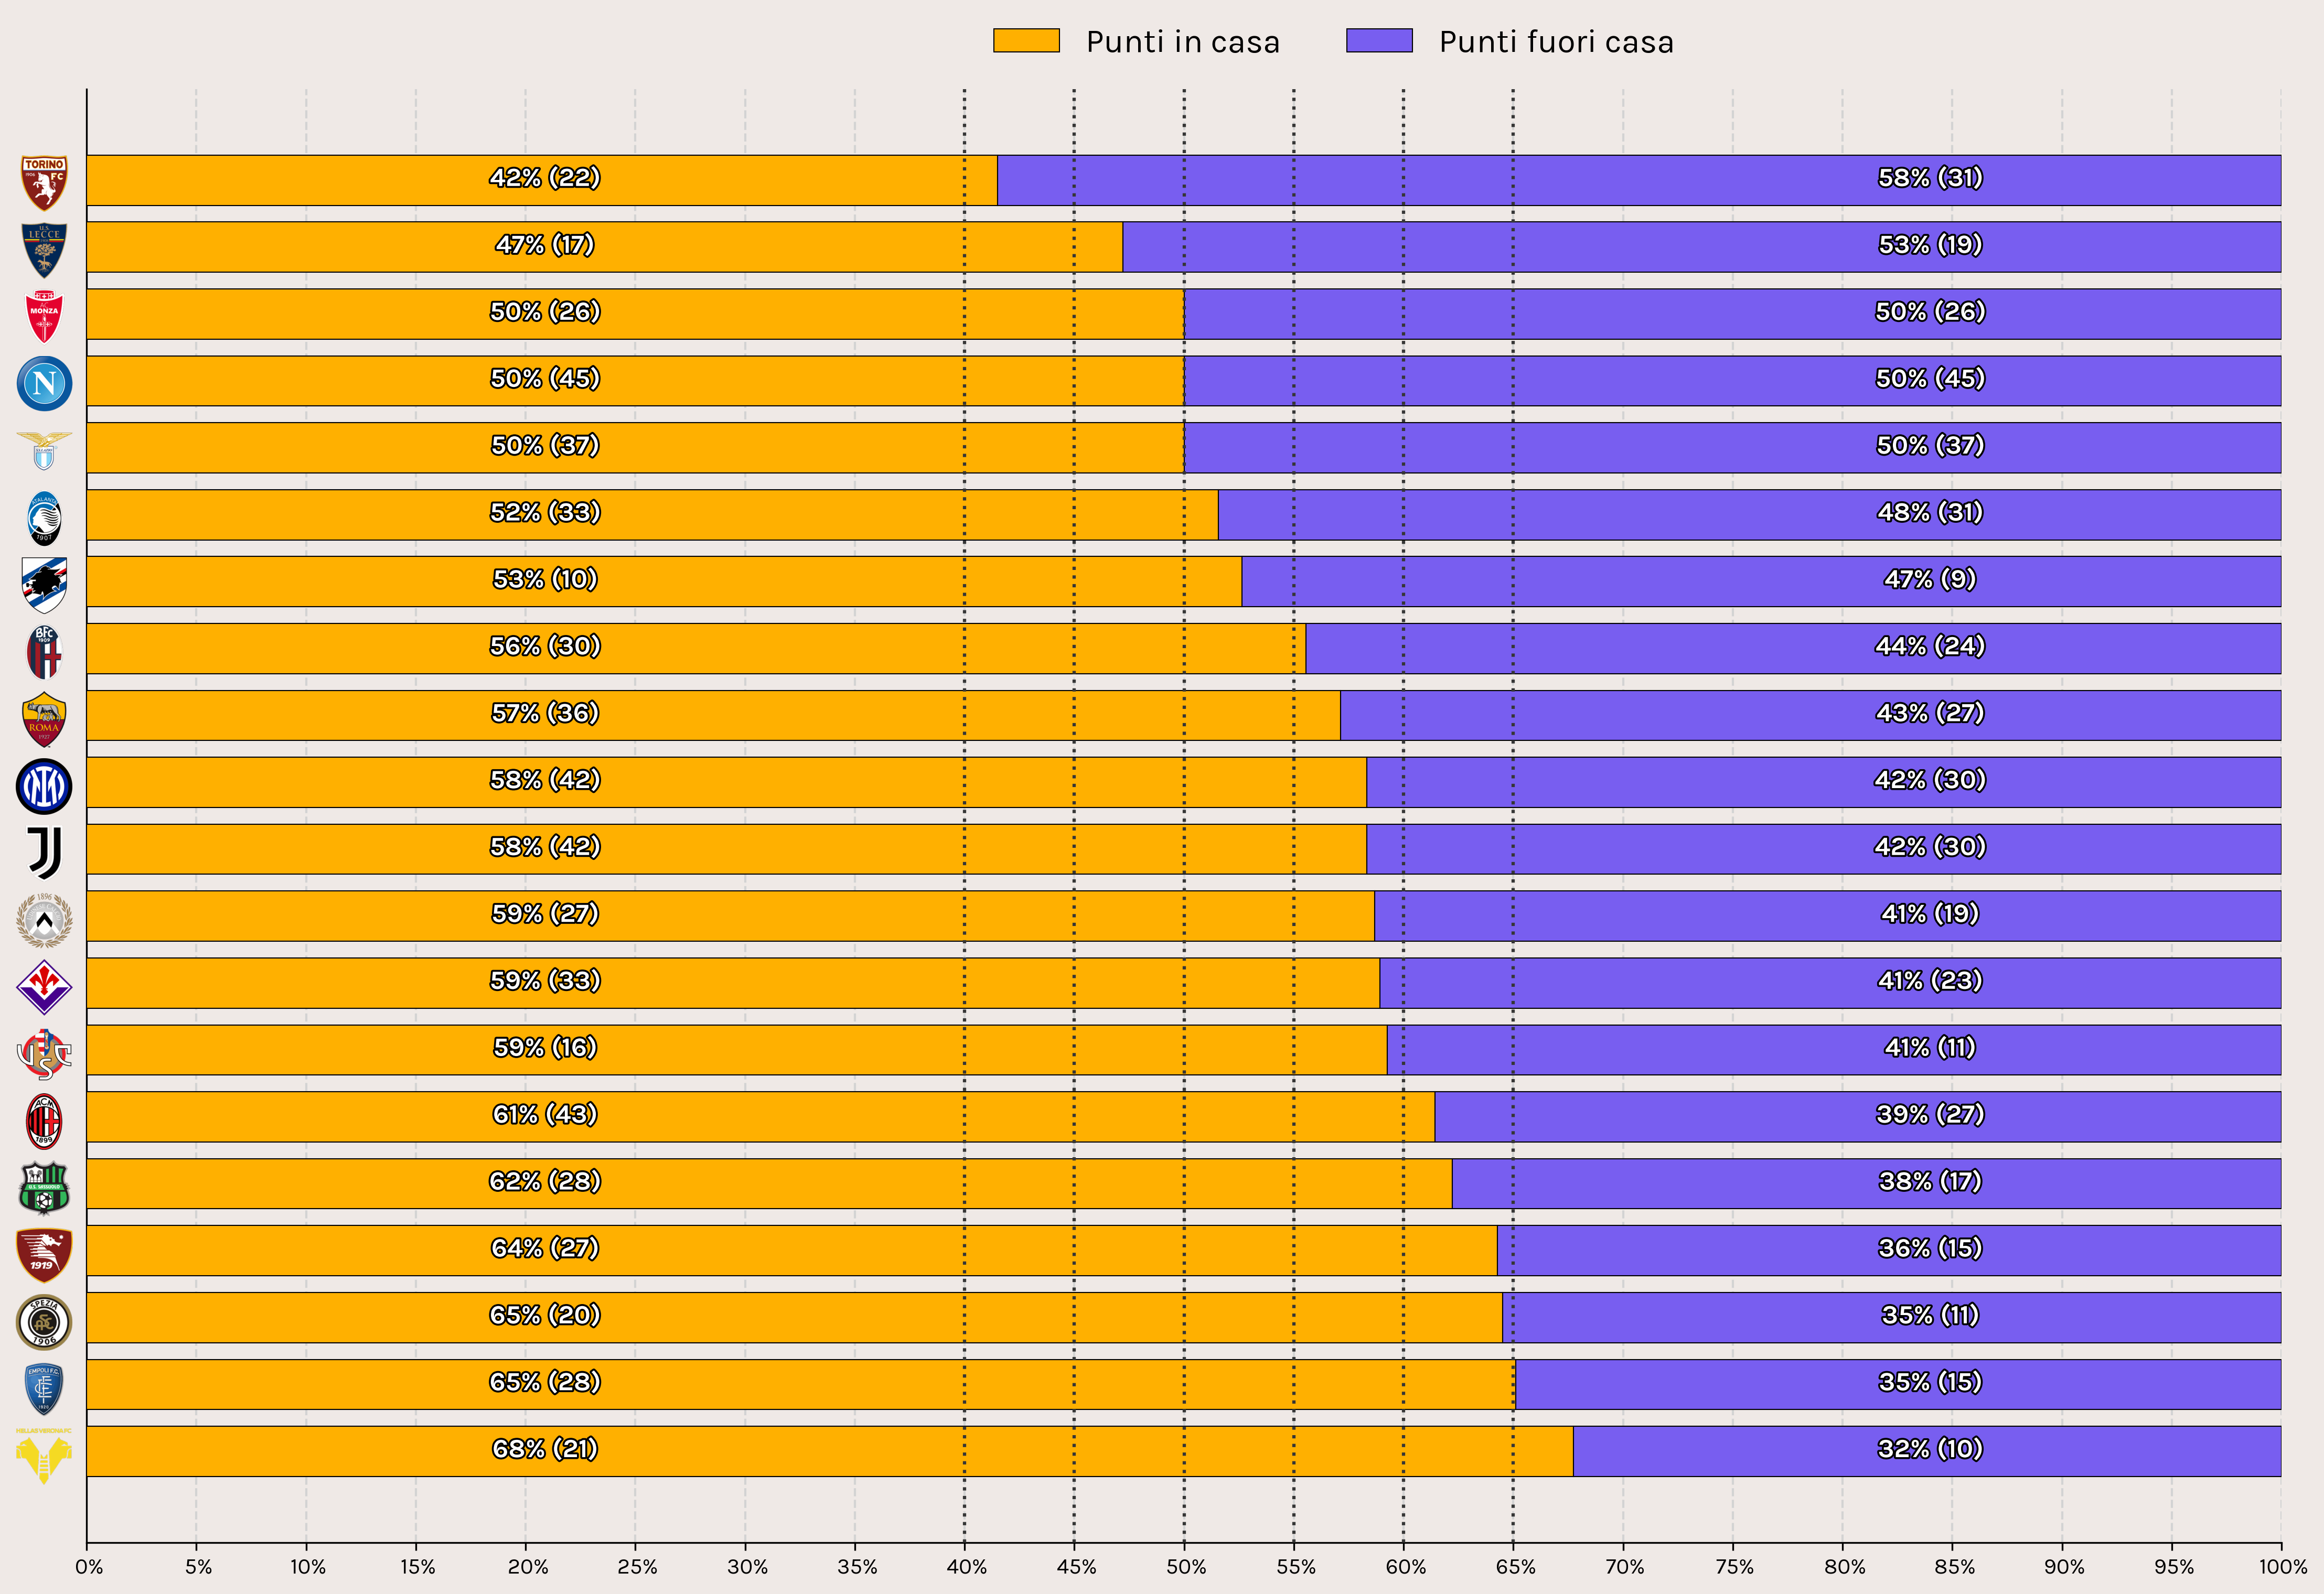

In [14]:
fig = plt.figure(figsize=(18, 12), dpi=300)
ax = plt.subplot()
plot(ax, fig, df_sum)

plt.savefig(
    "./figures/Rendimento_Casa-Fuori.png",
    dpi = 600,
    facecolor = "#EFE9E6",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)

plt.savefig(
    "./figures/Rendimento_Casa-Fuori_tr.png",
    dpi = 600,
    facecolor = "none",
    bbox_inches="tight",
    edgecolor="none",
    transparent = True
)